# Setup

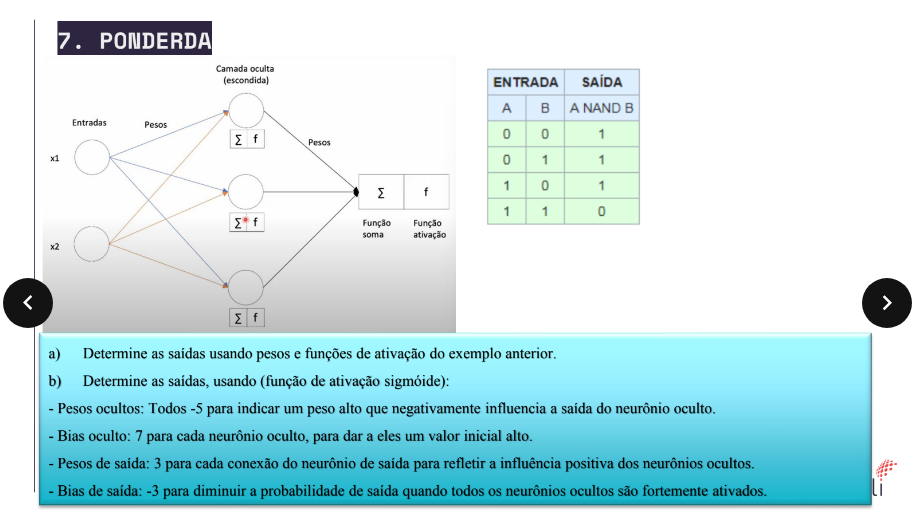

In [ ]:
import numpy as np

In [ ]:
class Relation:
  weight = 0
  neuron_from = None
  neuron_to = None

  def __init__(self, neuron_from = None, neuron_to = None, weight = 0):
    self.neuron_from = neuron_from
    self.neuron_to = neuron_to
    self.weight = weight

  def set_weight(self, weight):
    self.weight = weight;

  def set_neuron_from(self, neuron):
    self.neuron_from = neuron

  def set_neuron_to(self, neuron):
    self.neuron_to = neuron

  def get_total_value(self):
    return self.weight * self.neuron_from.value


class Neuron:
  value = 0
  bias = 0

  relations_behind = []

  def __init__(self, absolute_value = 0, bias = 0):
    self.set_absolute_value(absolute_value)
    self.set_bias(bias)
    self.relations_behind = []

  def set_bias(self, value):
    self.bias = value

  def set_absolute_value(self, value):
    self.value = value

  def set_value(self, value):
    self.value = self.activation_function(value + self.bias)
    print('Valor Final de Neurônio: ', self.value, '\n\n')

  def activation_function(self, x):
    return 1 / (1 + np.exp(-x))

  def set_value_by_relations(self):
    sum = 0
    for relation in self.relations_behind:
      sum += relation.get_total_value()

    print('Valor de Somatória das relações do Neurônio: ', sum)
    self.set_value(sum)

  def add_relation_behind(self, relation):
    self.relations_behind.append(relation)


class Layer:
  neurons = []

  def __init__(self):
      self.neurons = []

  def add_neuron(self, neuron):
    self.neurons.append(neuron)

  def add_neuron_n_create_relations(self, neuron, behind_layer, weights):
    for i in range(len(behind_layer.neurons)):

      relation = Relation()

      relation.set_weight(weights[i])
      relation.set_neuron_from(behind_layer.neurons[i])
      relation.set_neuron_to(neuron)

      neuron.add_relation_behind(relation)

    self.add_neuron(neuron)

  def set_neuron_values_by_relations(self):
    for neuron in self.neurons:
      neuron.set_value_by_relations()

class Neural_Sigmoid_Network:
  layers = []

  def __init__(self):
    self.layers = []

  def create_enter_layer(self, neurons):
    layer = Layer()
    for neuron in neurons:
      layer.add_neuron(neuron)

    self.layers.append(layer)

  def create_and_set_layer(self, neurons, weights):
    layer = Layer()

    for i in range(len(neurons)):
        layer.add_neuron_n_create_relations(neurons[i], self.layers[-1], weights[i])

    self.layers.append(layer)

  def calc_values(self):
    print("===== Valor dos neurônios da camada de entrada =====")
    for i in range(len(self.layers[0].neurons)):
      print(f"Neurônio {i + 1}: {self.layers[0].neurons[i].value}")


    print("\n\n")

    for i in range(1, len(self.layers)):
      print(f"===== Calculando Neurônios da camada {i} =====")
      self.layers[i].set_neuron_values_by_relations()



In [ ]:
print("============= EXEMPLO DO SLIDE =============")
network = Neural_Sigmoid_Network()

network.create_enter_layer(
    [Neuron(1), Neuron(1)]
)
network.create_and_set_layer(
    [Neuron(), Neuron(), Neuron()],
     [[-0.424, 0.358], [-0.740, -0.577], [-0.961, -0.469]]
)
network.create_and_set_layer(
    [Neuron()],
    [[-0.017, -0.893, 0.148]]
)

network.calc_values()

============= EXEMPLO DO SLIDE =============
===== Valor dos neurônios da camada de entrada =====
Neurônio 1: 1
Neurônio 2: 1



===== Calculando Neurônios da camada 1 =====
Valor de Somatória das relações do Neurônio:  -0.066
Valor Final de Neurônio:  0.4835059868921233 


Valor de Somatória das relações do Neurônio:  -1.317
Valor Final de Neurônio:  0.21131784831127748 


Valor de Somatória das relações do Neurônio:  -1.43
Valor Final de Neurônio:  0.19309868423321644 


===== Calculando Neurônios da camada 2 =====
Valor de Somatória das relações do Neurônio:  -0.16834783505262085
Valor Final de Neurônio:  0.4580121591884929 




In [ ]:
print("============= Exercício A =============")

arr_entrada = [[0,0], [0,1], [1,0], [1,1]]

for entrada in arr_entrada:
  print(f"============================ Testando entrada {entrada} ============================")
  network = Neural_Sigmoid_Network()

  network.create_enter_layer(
      [Neuron(entrada[0]), Neuron(entrada[1])]
  )
  network.create_and_set_layer(
      [Neuron(), Neuron(), Neuron()],
      [[-0.424, 0.358], [-0.740, -0.577], [-0.961, -0.469]]
  )
  network.create_and_set_layer(
      [Neuron()],
      [[-0.017, -0.893, 0.148]]
  )

  network.calc_values()

============= Exercício A =============
============================ Testando entrada [0, 0] ============================
===== Valor dos neurônios da camada de entrada =====
Neurônio 1: 0
Neurônio 2: 0



===== Calculando Neurônios da camada 1 =====
Valor de Somatória das relações do Neurônio:  0.0
Valor Final de Neurônio:  0.5 


Valor de Somatória das relações do Neurônio:  0.0
Valor Final de Neurônio:  0.5 


Valor de Somatória das relações do Neurônio:  0.0
Valor Final de Neurônio:  0.5 


===== Calculando Neurônios da camada 2 =====
Valor de Somatória das relações do Neurônio:  -0.381
Valor Final de Neurônio:  0.40588573188433286 


============================ Testando entrada [0, 1] ============================
===== Valor dos neurônios da camada de entrada =====
Neurônio 1: 0
Neurônio 2: 1



===== Calculando Neurônios da camada 1 =====
Valor de Somatória das relações do Neurônio:  0.358
Valor Final de Neurônio:  0.5885562043858291 


Valor de Somatória das relações do Neurôni

In [ ]:
print("============= Exercício B =============")

arr_entrada = [[0,0], [0,1], [1,0], [1,1]]

for entrada in arr_entrada:
  print(f"============================ Testando entrada {entrada} ============================")
  network = Neural_Sigmoid_Network()

  network.create_enter_layer(
      [Neuron(entrada[0]), Neuron(entrada[1])]
  )
  network.create_and_set_layer(
      [Neuron(bias=7), Neuron(bias=7), Neuron(bias=7)],
      [[-5, -5], [-5, -5], [-5, -5]]
  )
  network.create_and_set_layer(
      [Neuron(bias=-3)],
      [[3, 3, 3]]
  )

  network.calc_values()

============= Exercício B =============
============================ Testando entrada [0, 0] ============================
===== Valor dos neurônios da camada de entrada =====
Neurônio 1: 0
Neurônio 2: 0



===== Calculando Neurônios da camada 1 =====
Valor de Somatória das relações do Neurônio:  0
Valor Final de Neurônio:  0.9990889488055994 


Valor de Somatória das relações do Neurônio:  0
Valor Final de Neurônio:  0.9990889488055994 


Valor de Somatória das relações do Neurônio:  0
Valor Final de Neurônio:  0.9990889488055994 


===== Calculando Neurônios da camada 2 =====
Valor de Somatória das relações do Neurônio:  8.991800539250395
Valor Final de Neurônio:  0.9975070700704219 


============================ Testando entrada [0, 1] ============================
===== Valor dos neurônios da camada de entrada =====
Neurônio 1: 0
Neurônio 2: 1



===== Calculando Neurônios da camada 1 =====
Valor de Somatória das relações do Neurônio:  -5
Valor Final de Neurônio:  0.8807970779778823